<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y = make_moons(n_samples = 500,noise = 0.30,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr",LogisticRegression(random_state = 42)),
        ("rf",RandomForestClassifier(random_state=42)),
        ("svc",SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
voting_clf.named_estimators

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,"=",clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
voting_clf.score(X_test,y_test)

0.912

In [ ]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.92

#Bagging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                            max_samples = 100,n_jobs = -1,random_state=42)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

#Out-of-Bag evaluation

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                            oob_score=True,n_jobs = -1,random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_#out of bag score

0.896

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.92

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs = -1,random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt",max_leaf_nodes=16),
    n_estimators=500,n_jobs=-1,random_state = 42)


In [ ]:
bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)
np.all(y_pred_bag ==y_pred_rf)

True

In [ ]:
rnd_clf.feature_importances_

array([0.42253629, 0.57746371])

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score,name in zip(rnd_clf.feature_importances_,iris.data.columns):
  print(round(score,2),name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


In [ ]:
import matplotlib.pyplot as plt

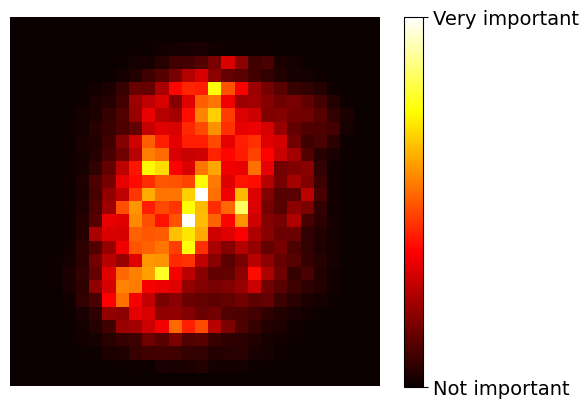

In [ ]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist =fetch_openml('mnist_784',return_X_y=True, as_frame = False,
                               parser = "auto")

rnd_clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rnd_clf.fit(X_mnist,y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image,cmap = "hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important','Very important'],fontsize=14)
plt.axis('Off')
plt.show()

#Boosting

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),n_estimators=30,
    learning_rate=0.5,random_state = 42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

#Gradient Boosting

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3* X[:,0]**2 +0.05* np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state = 42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2,random_state = 43)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [ ]:
y3 = y2-tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2,random_state = 44)
tree_reg3.fit(X,y3)


DecisionTreeRegressor(max_depth=2, random_state=44)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 2,n_estimators = 3,
                                 learning_rate=1.0,random_state = 42)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt_best =GradientBoostingRegressor(
    max_depth = 2,learning_rate = 0.05,n_estimators=500,n_iter_no_change=10,random_state = 42
)
gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

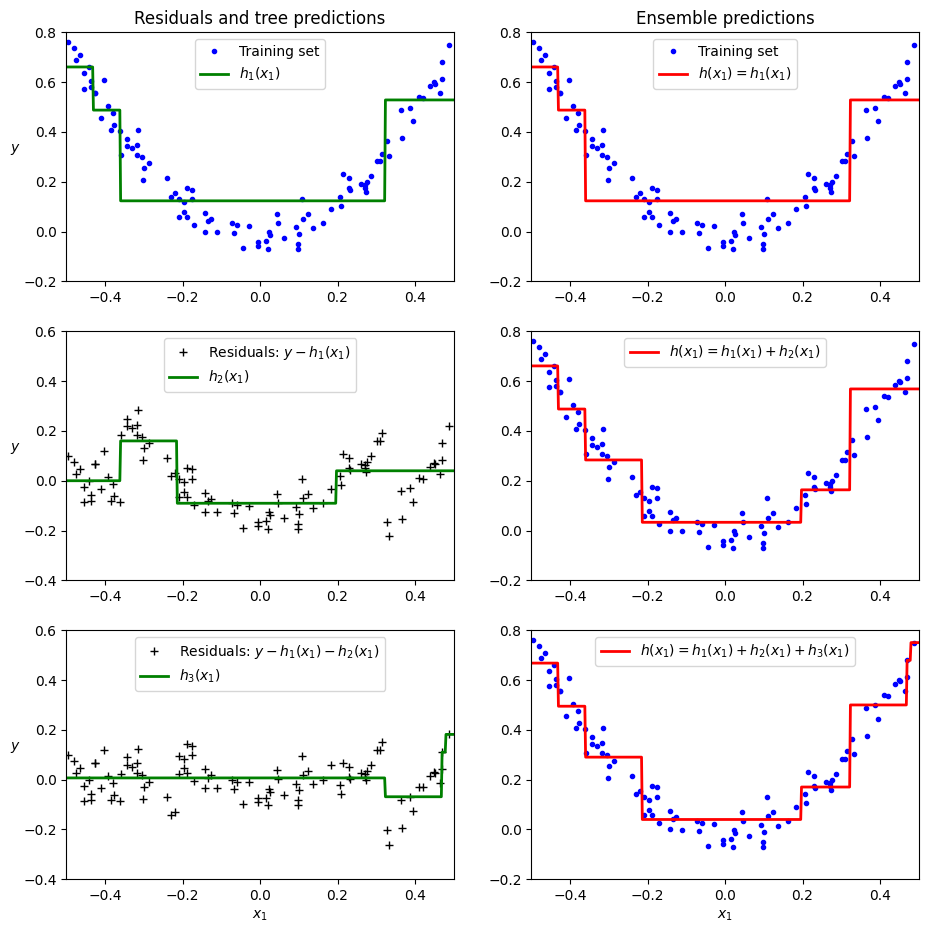

In [ ]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="g-",
                 label="$h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")

plt.show()

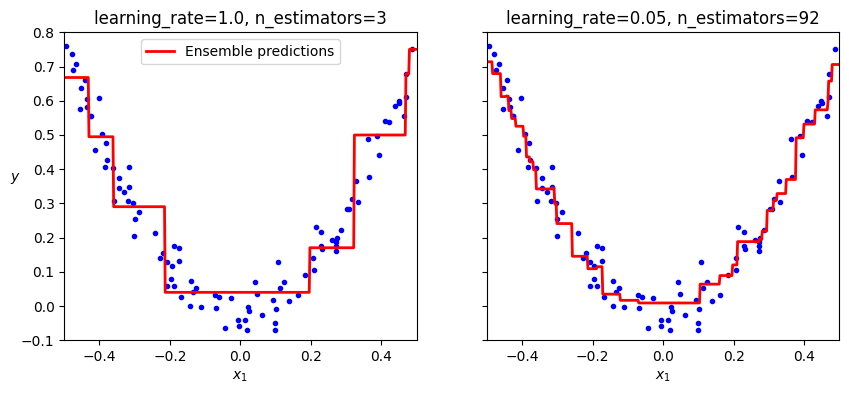

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ("lr",LogisticRegression(random_state = 42)),
        ("svc",SVC(probability = True,random_state=42)),
        ("rf",RandomForestClassifier(random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state = 43),
    cv = 5
)
stacking_clf.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [ ]:
stacking_clf.score(X_test,y_test)

0.912